In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df=pd.read_excel('/content/data_final.xlsx')

In [65]:
df.shape

(100, 3)

In [66]:
df.head()

,observation,feature,price
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   observation  100 non-null    float64
 1   feature      100 non-null    float64
 2   price        100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [68]:
df.describe(include='all')

,observation,feature,price
count,100.000000,100.000000,100.000000
mean,0.550300,0.501700,554.214600
std,0.293841,0.307124,347.312796
min,0.010000,0.000000,42.080000
25%,0.300000,0.230000,278.172500
50%,0.570000,0.485000,514.285000
75%,0.822500,0.760000,751.752500
max,1.000000,0.990000,1563.820000


In [69]:
df.isnull().sum()

observation    0
feature        0
price          0
dtype: int64

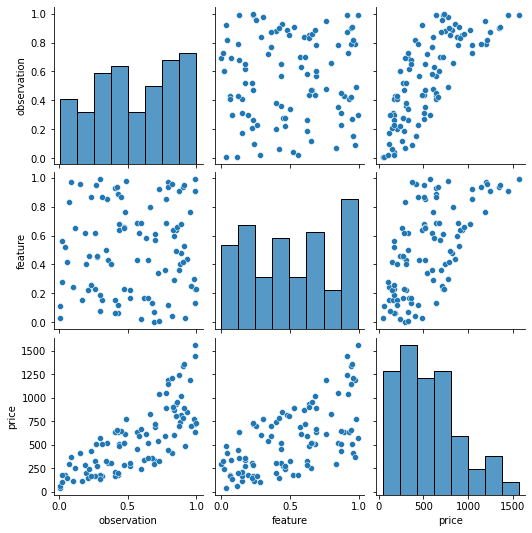

In [70]:
sns.pairplot(data=df)

[Text(0, 0, '0.01'),
 Text(0, 0, '0.02'),
 Text(0, 0, '0.04'),
 Text(0, 0, '0.06'),
 Text(0, 0, '0.07'),
 Text(0, 0, '0.09'),
 Text(0, 0, '0.1'),
 Text(0, 0, '0.12'),
 Text(0, 0, '0.15'),
 Text(0, 0, '0.17'),
 Text(0, 0, '0.19'),
 Text(0, 0, '0.2'),
 Text(0, 0, '0.21'),
 Text(0, 0, '0.22'),
 Text(0, 0, '0.23'),
 Text(0, 0, '0.26'),
 Text(0, 0, '0.27'),
 Text(0, 0, '0.28'),
 Text(0, 0, '0.3'),
 Text(0, 0, '0.31'),
 Text(0, 0, '0.34'),
 Text(0, 0, '0.35'),
 Text(0, 0, '0.36'),
 Text(0, 0, '0.38'),
 Text(0, 0, '0.41'),
 Text(0, 0, '0.42'),
 Text(0, 0, '0.43'),
 Text(0, 0, '0.44'),
 Text(0, 0, '0.45'),
 Text(0, 0, '0.47'),
 Text(0, 0, '0.48'),
 Text(0, 0, '0.49'),
 Text(0, 0, '0.52'),
 Text(0, 0, '0.57'),
 Text(0, 0, '0.58'),
 Text(0, 0, '0.6'),
 Text(0, 0, '0.62'),
 Text(0, 0, '0.63'),
 Text(0, 0, '0.65'),
 Text(0, 0, '0.66'),
 Text(0, 0, '0.68'),
 Text(0, 0, '0.69'),
 Text(0, 0, '0.7'),
 Text(0, 0, '0.72'),
 Text(0, 0, '0.73'),
 Text(0, 0, '0.77'),
 Text(0, 0, '0.78'),
 Text(0, 0, '0.79'

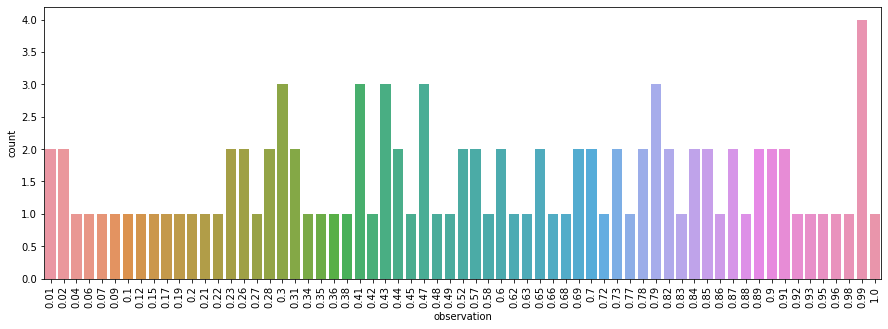

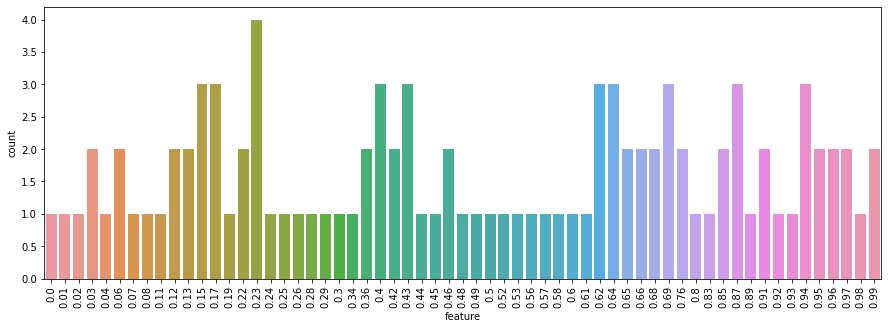

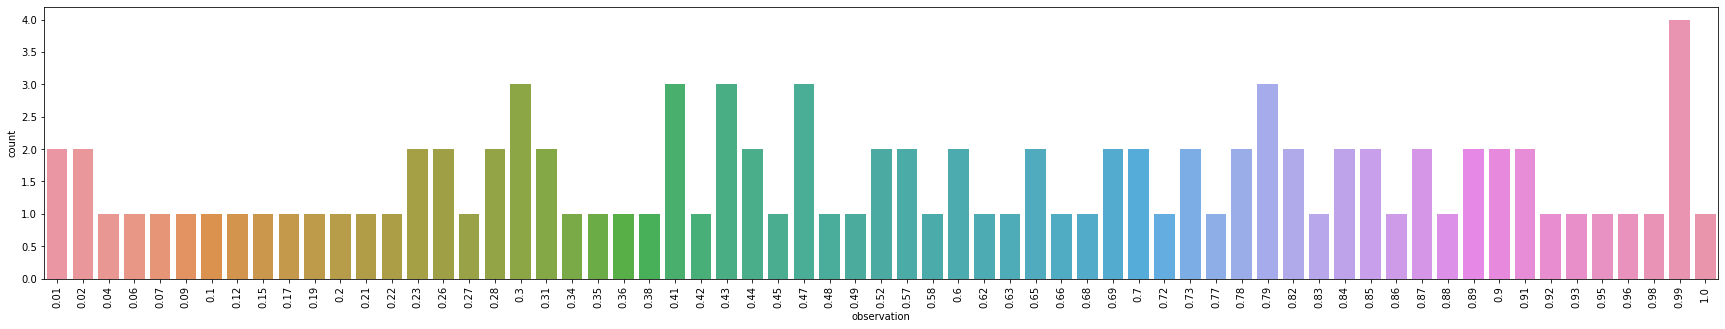

In [71]:
plt.figure(figsize=(15,5))
s1=sns.countplot(data=df,x='observation')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)

plt.figure(figsize=(15,5))
s1=sns.countplot(data=df,x='feature')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)

plt.figure(figsize=(30,5))
s1=sns.countplot(data=df,x='observation')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)

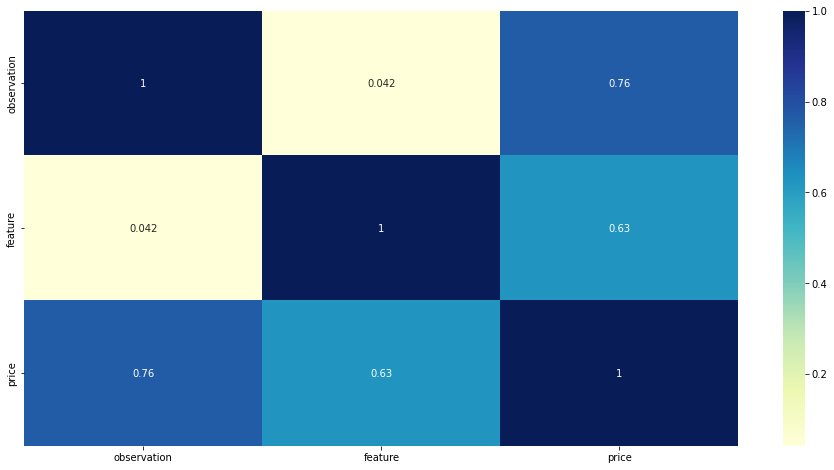

In [72]:
plt.figure(figsize = (16, 8))
sns.heatmap(df.corr(),annot = True, cmap="YlGnBu")
plt.show()

# **Splitting Dataset into Independent and dependent Column**

In [73]:
x=df.drop(['price'],axis=1)
y=df['price']


In [74]:
x.shape


(100, 2)

In [75]:
y.shape

(100,)

Splitting the data into training and testing

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# **Selecting model**

In [77]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
print(reg)

LinearRegression()


In [78]:
y_pred=reg.predict(x_test)
y_pred

array([ 422.92105164,   47.6860807 ,  672.95650267,   56.83760309,
        650.49000489,  227.38242675,  584.94172425,  572.75078398,
        675.99592055,  702.01395065,  754.49558779,  976.31602532,
       1058.51575052, 1157.54871468,  522.61465589,  395.39994698,
        989.89478325,  105.07379908,  894.9587346 ,  701.28677307,
        422.4089372 ,  169.63111959,  274.77618826,  843.83164638,
       1083.32775735, -246.52191956,  991.24933217,  656.3050581 ,
        732.3926788 ,  936.0585972 ])

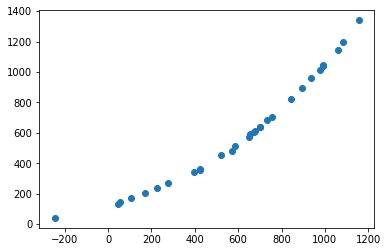

In [79]:
plt.scatter(y_pred,y_test)

In [80]:
reg.predict([[0.33,0.68]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([472.14820776])

# **Model Performance**

In [81]:
from sklearn import metrics as sm
print("Regressor model performance:")
print("Mean absolute error(MAE) =", 
round(sm.mean_absolute_error(y_test, y_pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test,
y_pred), 2))
print("Median absolute error =", 
round(sm.median_absolute_error(y_test, y_pred), 2))
print("Explain variance score =", 
round(sm.explained_variance_score(y_test, y_pred), 2))



Regressor model performance:
Mean absolute error(MAE) = 67.95
Mean squared error(MSE) = 7437.69
Median absolute error = 61.78
Explain variance score = 0.94


# **Polynomial Regression Model Building**

In [82]:

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(x_train)
lg1 = LinearRegression()
lg1.fit(X_poly,y_train)



LinearRegression()

In [83]:
y_pred1 = lg1.predict(poly_reg.fit_transform(x_test))
y_pred1

array([ 359.69822599,  131.69469235,  610.03937113,  149.21030432,
        565.89710297,  237.34726884,  521.00202284,  484.11497884,
        620.90943623,  631.82726913,  703.83356342, 1027.65800721,
       1151.52997806, 1331.96311525,  461.32548945,  341.12705786,
       1042.77436008,  170.2804545 ,  904.09899596,  635.6113259 ,
        362.32147286,  204.13439557,  266.89829492,  830.80900695,
       1205.35430134,   41.0148524 , 1040.01002485,  594.93031387,
        687.37271799,  965.27904618])

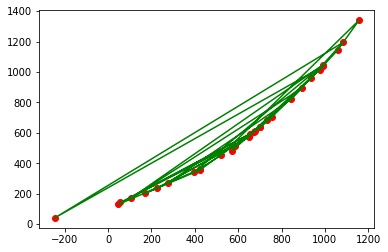

In [84]:
plt.scatter(y_pred,y_test,color='red')
plt.plot(y_pred,y_test,color='green')


In [85]:
reg.predict([[0.34,0.68]])


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([481.1512045])

In [86]:
reg.predict([[0.33,0.19]])


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([147.56147935])

In [87]:
from sklearn import metrics as sm
print("Regressor model performance:")
print("Mean absolute error(MAE) =", 
round(sm.mean_absolute_error(y_test, y_pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test,
y_pred), 2))
print("Median absolute error =", 
round(sm.median_absolute_error(y_test, y_pred), 2))
print("Explain variance score =", 
round(sm.explained_variance_score(y_test, y_pred), 2))

Regressor model performance:
Mean absolute error(MAE) = 67.95
Mean squared error(MSE) = 7437.69
Median absolute error = 61.78
Explain variance score = 0.94


## **Conclusion**
1. I have used Multiple Linear regression model and Polynomial Regression model. As I have plotted scatter-plot for these two models , it is seen that Polynomial regression model gives best regression line over the normal linear regression.
2. Almost all the points are on the regression line,hence Polynomial regression model is best to decide "price per square foot" .
3. Hence, for these DataSet ,Polynomial Regression model is more accurate than 
Multiple Linear regression model